In [24]:
from torchvision import models
import torch.nn as nn
import torch
import matplotlib.pyplot as plt

In [25]:
import os
fruits = {}
img_path = 'Data/train/'
image = os.listdir(img_path)
for idx, filename in enumerate(image):
    fruits[idx] = filename
print(image)


['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


In [26]:
import torchvision.transforms.v2 as tfs
from torchvision import models
from PIL import Image


class ImgageLoad:
    def __init__(self):
        self.model = models.vgg16(weights=models.VGG16_Weights.DEFAULT)
        self.model.classifier[6] = nn.Linear(4096, 36)
        self.model.load_state_dict(torch.load('model.pth'))
        self.model.eval()
        self.transform = tfs.Compose([
            tfs.ToImage(),
            tfs.ToDtype(torch.float32, scale=True),
            tfs.CenterCrop(224),
        ])

    def predict(self, image_path):
        img = Image.open(image_path).convert('RGB')
        if self.transform:
            img = self.transform(img)

        img = img.unsqueeze(0)

        with torch.no_grad():
            output = self.model(img)
            predict = output.argmax(dim=1).item()

        return predict




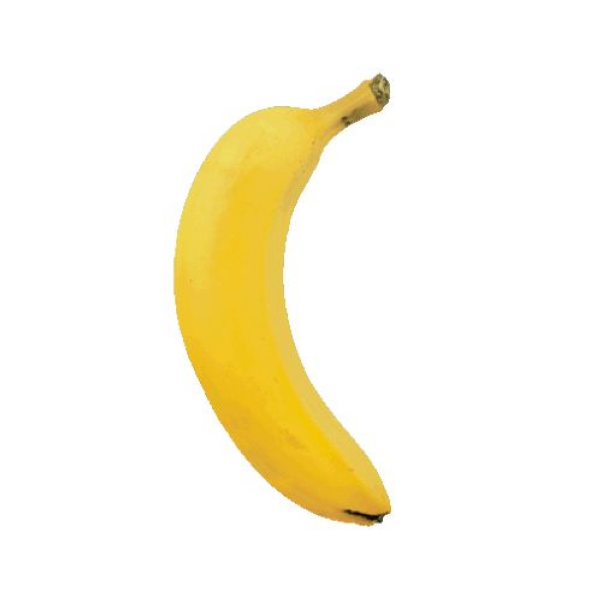

In [30]:

img = Image.open(r'D:\Kaggle\Fruits\realData\banan.jpg')


fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(img)
ax.axis('off')
fig.tight_layout()
plt.show()

In [36]:
obj = ImgageLoad()
file_name = 'banan.jpg'
path = fr'D:\Kaggle\Fruits\realData\{file_name}'
num_classes = obj.predict(path)
print('Вывод модели:', fruits[num_classes])



Вывод модели: banana
